# Python Practice Lecture 8 MATH 342W Queens College
## Author: Amir ElTabakh
## Date: February 24, 2022

## Agenda:
* Predictions with linear models in Python
* Simple regression with nominal variables
* Correlation and Covariance
* Multivariate linear regression

## Loading in the Cars93 Dataset

We'll load in the Cars93 dataset. We'll load in the R-dataset.

In [1]:
# This package will allow you to download datasets from the R Langauge
!pip install --user statsmodels

In [3]:
# Importing dependencies
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns

# Load dataset
cars = sm.datasets.get_rdataset("Cars93", "MASS")

# Assign data to a variable
cars_df = pd.DataFrame(cars.data)
cars_df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


Usually, we are trying to build a model for `Price`. Let's see how `Horsepower` is related to price.

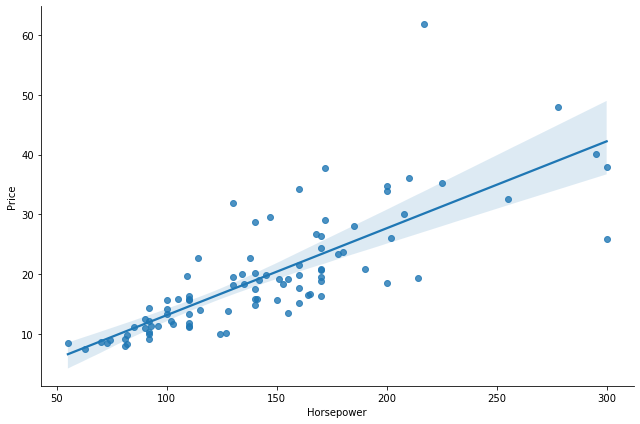

In [4]:
sns.lmplot(data=cars_df, x="Horsepower", y="Price", height=6, aspect=1.5) # aspect: width = 1.5 * height

## Fitting linear model

In [5]:
# Initializing model
model = LinearRegression()

# Defining X and y
y = cars_df[['Price']]
X = cars_df[['Horsepower']]

# fit model
model.fit(X, y)

LinearRegression()

After the model is fit, you may want to predict with it using the $g$ function. Every model as a `.predict()` method you could use. We'll pass in the entire 'Horsepower' column to get a prediction for each value.

We'll calculate performance metrics as well.

In [6]:
# Get yhat
yhat = model.predict(X)
yhat[0:5]

array([[18.95320262],
       [27.67547622],
       [23.60508187],
       [23.60508187],
       [28.83844603]])

In [7]:
# Calculating Root Mean Squared Error
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_true=y, y_pred=yhat, squared=False)

print(rmse)

5.9123352770549324


In [7]:
# R^2
model.score(X, y)

0.6212869500338225

62\% is pretty good $R^2$! But the RMSE is about 6,000 dollars. Using the empirical rule heuristic, that means you can only predict within $\pm \$6,000$ around 95\% of the time. Not so good!

## Predictions with linear models in R

After the model is fit, you may want to predict with it using the $g$ function. Of course Python can do this:

In [8]:
# make a prediction
model.predict([[200]])#[0][0]

C:\Users\KW\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[27.67547622]])

In [9]:
# make multiple predictions at once
model.predict([[200],[300], [400]])

E:\Users\amira\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[27.67547622],
       [42.21259889],
       [56.74972156]])

## Simple regression with nominal variables

Let's take a look at the factor variable as the predictor. We'll use `Origin` in this example:

In [10]:
cars_df['Origin'].value_counts()

USA        48
non-USA    45
Name: Origin, dtype: int64

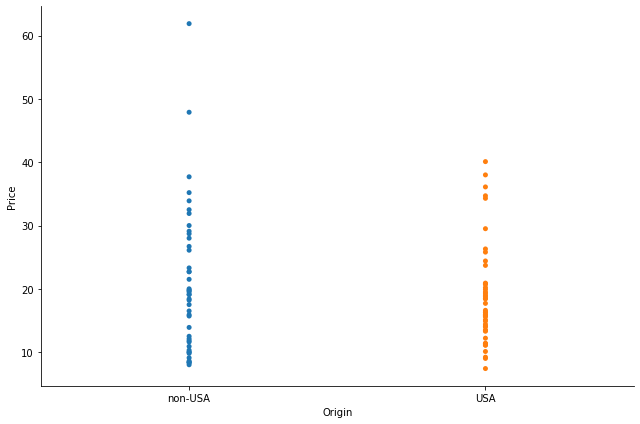

In [11]:
# Lets plot it
sns.catplot(data=cars_df, x="Origin", y="Price", jitter=False, height=6, aspect=1.5) # aspect: width = 1.5 * height

In [12]:
# Plot a line plot
#sns.lmplot(data=cars_df, x="Origin", y="Price", height=6, aspect=1.5) # aspect: width = 1.5 * height

Note that the Seaborn `lineplot` cannot render a line for a factor variable. 

However ...

### `statsmodels` Library
`statsmodels` supports specifying models using R-style formulas and pandas DataFrames. Here is a simple example using ordinary least squares:

In [13]:
# install the library
!pip install statsmodels

In [13]:
import statsmodels.formula.api as smf

# fit model
model = smf.ols('Price ~ Origin', data=cars_df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9323
Date:                Sat, 08 Jan 2022   Prob (F-statistic):              0.337
Time:                        19:13:21   Log-Likelihood:                -341.90
No. Observations:                  93   AIC:                             687.8
Df Residuals:                      91   BIC:                             692.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            18.5729      1.39

What happened here? The `lm` function can handle factors. It picks a level to be the reference category (in this case, it's origin = USA) and the fitted slope $b_1$ would be the difference between non-USA and USA. Does it make sense that the slope is positive? Yes - foreign cars charge transport fees and there are a lot of luxury foreign cars.

Why is $R^2$ so low?? Remember the null model is one $\bar{y}$, this model is just two $\bar{y}$'s. How much variance can you possibly expect to explain with just two possible prediction values?? Now take a look at RMSE. It's about 10,000 dollars. Before, it was about 6,000 dollars and the $R^2$ = 62\%. Yes the RMSE has gone up in this case. $R^2$ is not proportion standard error explained, it's proportion variance and that squared error is very different than its square root.

Let's cast this predict as numeric and run it again just to make sure it will be the same. We first code a new dummy variable:


In [14]:
# adding new column
cars_df['origin_is_not_usa'] = [1 if (cars_df['Origin'][i] == "non-USA") else 0 for i in range(len(cars_df))]
cars_df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make,origin_is_not_usa
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra,1
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend,1
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90,1
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100,1
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i,1


and then we model using this new dummy variable:

In [15]:
# fit model
model = smf.ols('Price ~ origin_is_not_usa', data=cars_df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9323
Date:                Sat, 08 Jan 2022   Prob (F-statistic):              0.337
Time:                        19:14:56   Log-Likelihood:                -341.90
No. Observations:                  93   AIC:                             687.8
Df Residuals:                      91   BIC:                             692.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            18.5729      1.39

Note the reference category is USA and the "non-USA" coefficient indicates the difference in sample averages.

Note that now Seaborn and ggplot can handle the line:

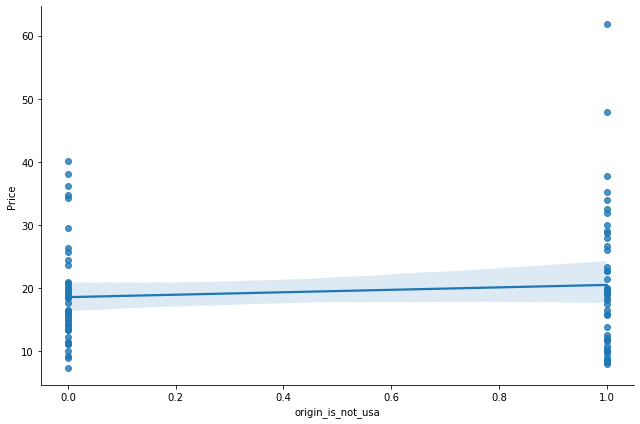

In [17]:
sns.lmplot(data=cars_df, x="origin_is_not_usa", y="Price", height=6, aspect=1.5)

Let's code the dummy variable differently to take a look at the equivalent regression but this time with the reference category as non-USA:

In [18]:
# adding new column
cars_df['origin_is_usa'] = [1 if (cars_df['Origin'][i] == "USA") else 0 for i in range(len(cars_df))]
cars_df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make,origin_is_not_usa,origin_is_usa
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,102,68,37,26.5,11.0,2705,non-USA,Acura Integra,1,0
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,115,71,38,30.0,15.0,3560,non-USA,Acura Legend,1,0
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,102,67,37,28.0,14.0,3375,non-USA,Audi 90,1,0
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,106,70,37,31.0,17.0,3405,non-USA,Audi 100,1,0
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,109,69,39,27.0,13.0,3640,non-USA,BMW 535i,1,0


In [19]:
# fit model
model = smf.ols('Price ~ origin_is_usa', data=cars_df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9323
Date:                Sat, 08 Jan 2022   Prob (F-statistic):              0.337
Time:                        19:16:05   Log-Likelihood:                -341.90
No. Observations:                  93   AIC:                             687.8
Df Residuals:                      91   BIC:                             692.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        20.5089      1.440     14.238

The coefficients here are like "the opposite" in some sense of what we just saw. 

And of course $R^2$ and RMSE are equivalent - it's the same linear model with the same information, just coded differently.

What if the intercept is left out? You can remove the intercept from the formula by adding "0 + ..." which means "no intercept but ..."

In [20]:
# fit model
model = smf.ols('Price ~ 0 + origin_is_usa', data=cars_df).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.376
Model:                            OLS   Adj. R-squared (uncentered):              0.370
Method:                 Least Squares   F-statistic:                              55.55
Date:                Sat, 08 Jan 2022   Prob (F-statistic):                    4.87e-11
Time:                        16:56:39   Log-Likelihood:                         -396.39
No. Observations:                  93   AIC:                                      794.8
Df Residuals:                      92   BIC:                                      797.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Why did $R^2$ seem like it changed? The `lm` method is calculating $R^2$ differently here because there is no intercept. The null model is comparing to $g_0 = 0$ and not to $g_0 = \bar{y}$. This is a small point about the implementation in R and you won't be tested on this trivia.

Let's do an example of a categorical nominal variable with L>2 levels. We'll explore the categorical `Type` column.

In [20]:
# Mean price of different type of cars - we'll be using the Pandas groupby() method
cars_df.groupby(['Type'])['Price'].mean()

Type
Compact    18.212500
Large      24.300000
Midsize    27.218182
Small      10.166667
Sporty     19.392857
Van        19.100000
Name: Price, dtype: float64

What is the reference level in this variable? Can we change it?

In [21]:
# Print out categories
cars_df['Type'].unique()

array(['Small', 'Midsize', 'Compact', 'Large', 'Sporty', 'Van'],
      dtype=object)

In [23]:
# fit model
model = smf.ols('Price ~ Type', data=cars_df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     11.53
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           1.48e-08
Time:                        16:56:39   Log-Likelihood:                -318.73
No. Observations:                  93   AIC:                             649.5
Df Residuals:                      87   BIC:                             664.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          18.2125      1.926     

In [22]:
# fit model
model = smf.ols('Price ~ 0 + Type', data=cars_df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     11.53
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           1.48e-08
Time:                        19:20:39   Log-Likelihood:                -318.73
No. Observations:                  93   AIC:                             649.5
Df Residuals:                      87   BIC:                             664.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Type[Compact]    18.2125      1.926      9.457

## Correlation and Covariance

Let's load up the Boston Housing data again.

In [24]:
# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import sklearn's datasets module
from sklearn import datasets

# Load the Boston Housing dataset as bh
bh = datasets.load_boston()

# Initialize target variable
y = bh.target
y

# Create Boston Housing df
df = pd.DataFrame(data = bh.data, columns = bh.feature_names)

df['MEDV'] = y

# Load the first 5 rows of df
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Let us take a look at some covariances and correlations with the response, the median home value. We already have NumPy imported.

In [25]:
# correlation
np.corrcoef(df['RM'], df['MEDV'])[0, 1]

0.695359947071539

In [26]:
# covariance
np.cov(df['RM'], df['MEDV'])[0, 1]

4.493445879544475

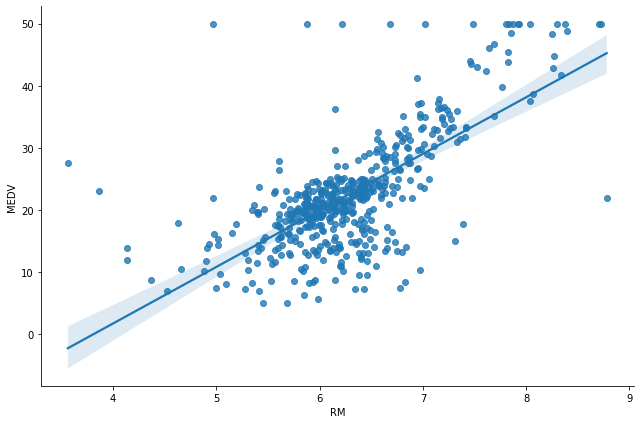

In [27]:
sns.lmplot(data=df, x="RM", y="MEDV", height=6, aspect=1.5)

In [28]:
# correlation
np.corrcoef(df['INDUS'], df['MEDV'])[1, 0]

-0.48372516002837285

In [29]:
# covariance
np.cov(df['INDUS'], df['MEDV'])[0, 1]

-30.520822823151878

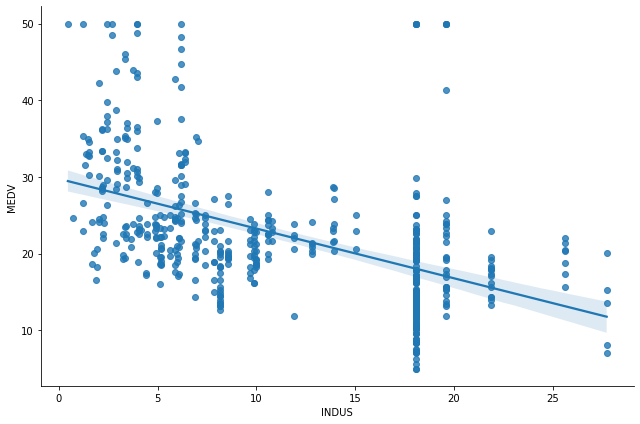

In [30]:
sns.lmplot(data=df, x="INDUS", y="MEDV", height=6, aspect=1.5)

Ever wonder why it's called $R^2$?\
We'll go back to writing linear models with sklearn.

In [31]:
# Initializing model
model = LinearRegression()

# Defining X and y
y = df[['RM']]
X = df[['MEDV']]

# fit model
model.fit(X, y)

# R^2
model.score(X, y)

0.483525455991334

In [32]:
# correlation
(np.corrcoef(df['RM'], df['MEDV'])[1, 0])**2

0.48352545599133356

In [33]:
# Initializing model
model = LinearRegression()

# Defining X and y
y = df[['INDUS']]
X = df[['MEDV']]

# fit model
model.fit(X, y)

# R^2
model.score(X, y)

0.23399003044447486

In [35]:
# correlation
(np.corrcoef(df['INDUS'], df['MEDV'])[1, 0])**2

0.23399003044447492

The correlation coefficient is denoted lowercase $r$. The correlation squared is your $R^2$!

## Multivariate linear regression

We want to run a multivariate linear regression $\mathcal{H}$ employing the least squares $\mathcal{A}$ manually using our derived linear algebra. Let us first pull out $\mathbb{D}$ as $y$ and $X$.

Let's ensure we augment the `X` to include the 1 vector in front. We need this for the intercept in the $w$ vector in our spec, $\mathcal{H}$.

We'll be using the Boston Housing data.

In [36]:
# Initialize target variable
y = bh.target
y

# Create Boston Housing df
X = pd.DataFrame(data = bh.data, columns = bh.feature_names)

# Load the first 5 rows of df
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


So $p = 13$ and $p + 1 = 14$.

Let's add the intercept column.

In [37]:
# insert new column in first position
X.insert(0, 'INTERCEPT', [1 for i in range(len(X))]) # list comprehension

X.head()

,INTERCEPT,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
# Convert df to matrix
X = X.to_numpy()

# Print first 10 rows of X
X[0:10]

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00,
        5.3800e-01, 6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00,
        2.9600e+02, 1.5300e+01, 3.9690e+02, 4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00,
        4.6900e-01, 6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00,
        2.4200e+02, 1.7800e+01, 3.9690e+02, 9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00,
        4.6900e-01, 7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00,
        2.4200e+02, 1.7800e+01, 3.9283e+02, 4.0300e+00],
       [1.0000e+00, 3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00,
        4.5800e-01, 6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00,
        2.2200e+02, 1.8700e+01, 3.9463e+02, 2.9400e+00],
       [1.0000e+00, 6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00,
        4.5800e-01, 7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00,
        2.2200e+02, 1.8700e+01, 3.9690e+02, 5.3300e+00],
       [1.0000e+00, 2.9850e-02, 0.0

Can we find $X^\top X$?

In [39]:
XtX = X.transpose() @ X
XtX

array([[5.06000000e+02, 1.82844292e+03, 5.75000000e+03, 5.63521000e+03,
        3.50000000e+01, 2.80675700e+02, 3.18002500e+03, 3.46989000e+04,
        1.92029160e+03, 4.83200000e+03, 2.06568000e+05, 9.33850000e+03,
        1.80477060e+05, 6.40245000e+03],
       [1.82844292e+03, 4.39703436e+04, 4.68702660e+02, 3.24790952e+04,
        6.48084600e+01, 1.22612317e+03, 1.08219511e+04, 1.68514980e+05,
        3.46627456e+03, 4.11186651e+04, 1.17307321e+06, 3.64715518e+04,
        4.99455291e+05, 3.72684187e+04],
       [5.75000000e+03, 4.68702660e+02, 3.40029000e+05, 2.09030900e+04,
        2.70000000e+02, 2.48444175e+03, 3.87184670e+04, 2.05485400e+05,
        3.82992940e+04, 2.29180000e+04, 1.72295450e+06, 9.61321500e+04,
        2.23960499e+06, 3.80196800e+04],
       [5.63521000e+03, 3.24790952e+04, 2.09030900e+04, 8.65256299e+04,
        4.45170000e+02, 3.43239536e+03, 3.44618165e+04, 4.49313490e+05,
        1.62206733e+04, 7.17656500e+04, 2.72134904e+06, 1.06875320e+05,
        1.897

Is it full rank?

In [40]:
XtX_inverse = np.linalg.inv(XtX)

It worked. This means $X$ is full rank i.e. there is no linear duplication of information over the `13 + 1` predictors. In case we're in doubt:

In [41]:
# Matrix rank
print(np.linalg.matrix_rank(X))
print(np.linalg.matrix_rank(X.transpose()))
print(np.linalg.matrix_rank(XtX))
print(np.linalg.matrix_rank(XtX_inverse))

14
14
14
14


Let's calculate the Least Squares solution then:

In [42]:
b = XtX_inverse @ X.transpose() @ y
b

array([ 3.64594884e+01, -1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
        2.68673382e+00, -1.77666112e+01,  3.80986521e+00,  6.92224640e-04,
       -1.47556685e+00,  3.06049479e-01, -1.23345939e-02, -9.52747232e-01,
        9.31168327e-03, -5.24758378e-01])

Interpretation: if `crim` "increases" by 1, $\hat{y}$ increases by... etc etc. How would `crim` increase? Big philosophical topic which we are punting on (for now). If all predictors are 0, then $y$ would be predicted to be the intercept, 20.65. Strange concept... not usually important.

What would $g$ look like?

In [43]:
def g_predict_function(x_star):
    print(x_star @ b)
    
g_predict_function(X[6]) # The 7th row

23.001808268483444


In [44]:
# print true y value at index 6
y[6]

22.9

Pretty simple...  and `x_star` could be a matrix of `n_star * (p + 1)` - where `n_star` is however many new observations you wish to predict.

We can compute all predictions:

In [45]:
# calculating all yhat predictions
yhat = X @ b
yhat[0:10]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211])

Can you tell this is projected onto a 14 dimensionsal space from a 506 dimensional space? Not really... but it is...

We can calculate the residuals:

In [46]:
# Calculating residuals
e = y - yhat
e[0:10]

array([-6.00384338, -3.42556238,  4.13240328,  4.79296351,  8.25647577,
        3.44371554, -0.10180827,  7.56401157,  4.97636315, -0.02026211])

What is RMSE?

In [47]:
# SSE
sse = e.transpose() @ e
sse

11078.784577954975

In [48]:
# MSE
nrow = len(X) # number of rows
ncol = len(X[0]) # number of columns
mse = 1 / (nrow - ncol) * sse
mse

22.51785483324182

In [49]:
# RMSE
rmse = np.sqrt(mse)
rmse

4.7452981816996305

Interpret the RMSE...

We can calculate $R^2$ two ways:

In [50]:
# Method one
sigma_squared_y = np.var(y)
sigma_Squared_e = np.var(e)

Rsq = (sigma_squared_y - sigma_Squared_e) / sigma_squared_y

print(Rsq)

0.7406426641094095


In [51]:
# Method 2
n = len(e)

sst = (n - 1) * sigma_squared_y

Rsq = 1 - sse / sst

print(Rsq)

0.7401290852264578


Now, of course, Python has its own function to do all this. We've already seen them! To run a multivariate least squares linear model,

In [52]:
# initialize model
model = LinearRegression()

# fit model
model.fit(X, y)

# print b0
print(model.intercept_)

# print coefficients
print(model.coef_)

36.459488385090175
[ 0.00000000e+00 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]


Sklearn offers a simple way to get your predictions.

In [53]:
x_star = [X[6]] # stpre it as a list element

# predict y value for x_star
print(model.predict(x_star))

# print actual y
y[6]

[23.00180827]


22.9